Assignment
This coding challenge is designed to test your skill and intuition about real world data. For the challenge, we will use data collected by the New York City Taxi and Limousine commission about “Green” Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. We will use the data from September 2015.

Question 1
Programmatically download and load into your favorite analytical tool the trip data for September 2015
Report how many rows and columns of data you have loaded.
Question 2
Plot a histogram of the number of the trip distance (“Trip Distance”)
Report any structure you find and any hypotheses you have about that structure
Question 3
Report mean and median trip distance grouped by hour of day.
We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips
Question 4
Build a derived variable for tip as a percentage of the total fare.
Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.
Question 5
Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel your particular skills and/or expertise are best suited to. If you answer more than one, only the first will be scored.

Option A: Distributions

Build a derived variable representing the average speed over the course of a trip.
Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?
Can you build up a hypothesis of average trip speed as a function of time of day?
Option B: Visualization

Can you build a visualization (interactive or static) of the trip data that helps us understand intra- vs. inter-borough traffic? What story does it tell about how New Yorkers use their green taxis?
Option C: Search

We’re thinking about promoting ride sharing. Build a function that given point a point P, find the k trip origination points nearest P.
For this question, point P would be a taxi ride starting location picked by us at a given LAT-LONG.
As an extra layer of complexity, consider the time for pickups, so this could eventually be used for real time ride sharing matching.
Please explain not only how this can be computed, but how efficient your approach is (time and space complexity)
Option D: Anomaly Detection

What anomalies can you find in the data? Did taxi traffic or behavior deviate from the norm on a particular day/time or in a particular location?
Using time-series analysis, clustering, or some other method, please develop a process/methodology to identify out of the norm behavior and attempt to explain why those anomalies occurred.
Option E: Your own curiosity! --- If the data leaps out and screams some question of you that we haven’t asked, ask it and answer it! Use this as an opportunity to highlight your special skills and philosophies.



In [2]:
import pandas as pd

The `:02d` part is a string formatting syntax that specifies how to format the month variable. The `d` stands for decimal integer, and the `02` specifies that the integer should be zero-padded to 2 digits. For example, if the month variable is 1, then `{month:02d}` would be formatted as `01`.

In [40]:
def read_taxi_zone_data():
    # Read in the taxi zone data
    url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv"
    taxi_zone_data = pd.read_csv(url)
    return taxi_zone_data

taxi_zone_data = read_taxi_zone_data()


def locate_airports():
    mask = taxi_zone_data.Zone.str.contains("Airport")

    # replace NaN with False
    mask = mask.fillna(False)

    print(taxi_zone_data[mask])

In [41]:
locate_airports()

     LocationID Borough               Zone service_zone
0             1     EWR     Newark Airport          EWR
131         132  Queens        JFK Airport     Airports
137         138  Queens  LaGuardia Airport     Airports


In [9]:
def read_taxi_data(year, month):
    url = f"https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
    df = pd.read_parquet(url)
    print(f"Read {len(df)} rows from {url}")
    print(f"Downloaded {year}-{month} taxi data")
    print(f"Dataframe shape: {df.shape}")
    return df

df = read_taxi_data(2019, "01")

Read 672105 rows from https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2019-01.parquet
Downloaded 2019-01 taxi data
Dataframe shape: (672105, 20)


In [21]:
df1 = read_taxi_data(2022, "02")

Read 69399 rows from https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet
Downloaded 2022-02 taxi data
Dataframe shape: (69399, 20)


In [27]:
def join_taxi_zone_data(df):
    taxi_zone_data = read_taxi_zone_data()
    df = df.merge(taxi_zone_data, left_on="PULocationID", right_on="LocationID")
    df = df.merge(taxi_zone_data, left_on="DOLocationID", right_on="LocationID", suffixes=("_PU", "_DO"))
    return df

<Axes: ylabel='Frequency'>

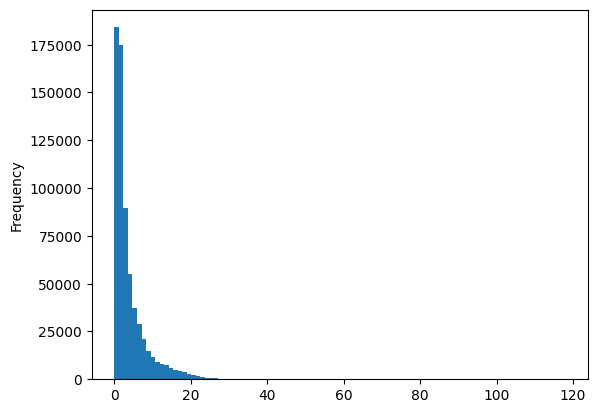

In [10]:
# plot a histogram of the 'trip_distance' column
df['trip_distance'].plot.hist(bins=100)

# Trip distance is skewed which makes sense considering that most trips in a city environment would be short. 

<Axes: xlabel='lpep_pickup_datetime'>

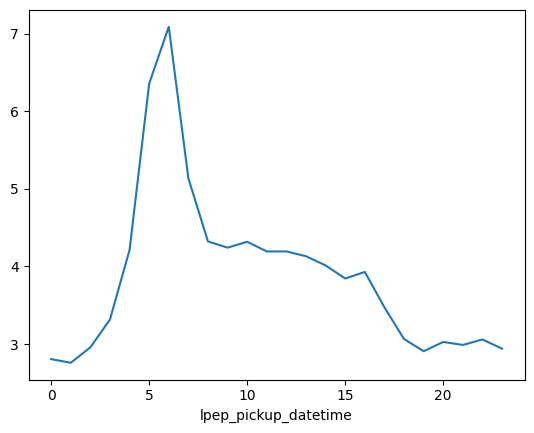

In [13]:
# Make a groupby by hour of day and plot the mean trip distance
df.groupby(df['lpep_pickup_datetime'].dt.hour)['trip_distance'].mean().plot()

In [14]:
# create an hour_of_day column
df['hour_of_day'] = df['lpep_pickup_datetime'].dt.hour

<Axes: >

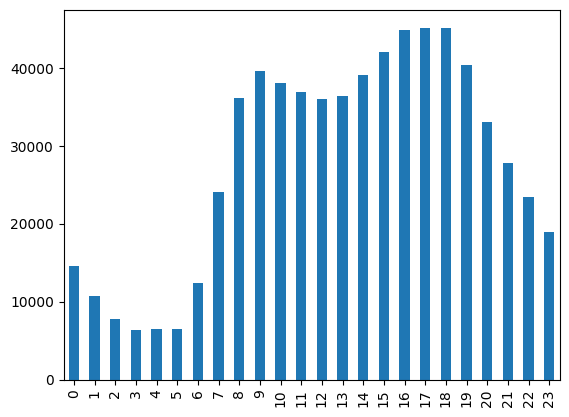

In [16]:
df.hour_of_day.value_counts().sort_index().plot.bar()

<Axes: xlabel='hour_of_day'>

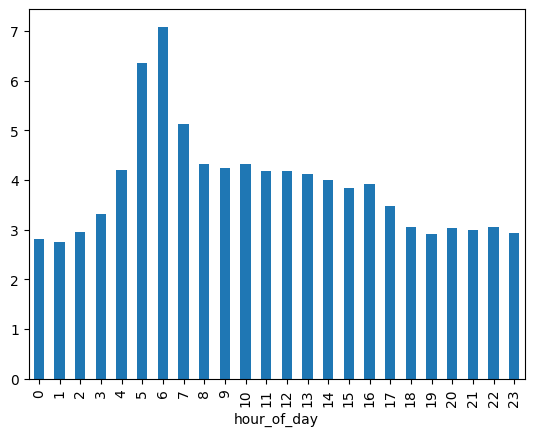

In [19]:
# groupby "hour_of_day"
df.groupby('hour_of_day')['trip_distance'].mean().plot.bar()

<Axes: xlabel='hour_of_day'>

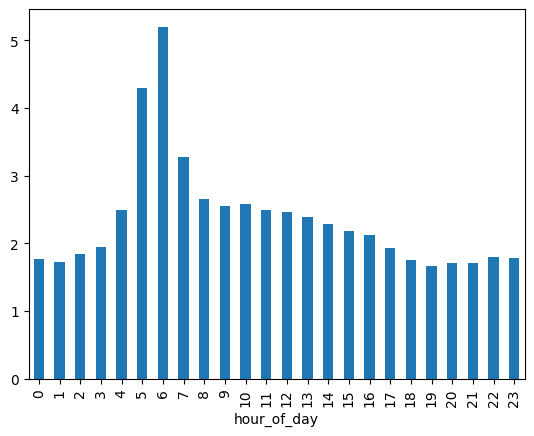

In [20]:
df.groupby('hour_of_day')['trip_distance'].median().plot.bar()
